<a href="https://colab.research.google.com/github/shonenkov/asr-shad/blob/feature-eda-galinakaleeva/jupyters/eda/eda_galinakaleeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Зависимости**

In [2]:
!git clone https://github.com/shonenkov/asr-shad > /dev/null
!pip install -r './asr-shad/requirements.txt' > /dev/null

Cloning into 'asr-shad'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 421 (delta 254), reused 339 (delta 184), pack-reused 0
Receiving objects: 100% (421/421), 2.78 MiB | 684.00 KiB/s, done.
Resolving deltas: 100% (254/254), done.


In [3]:
import sys

sys.path.insert(0, './asr-shad/utils')

from audio_stats import get_audio_stats

# **Исходные данные**

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
INPUT_DIR = "/content/drive/My Drive/Sirius project. Numbers"
!ls "{INPUT_DIR}"

numbers  numbers_sirius.ipynb  train_audio_stats.csv


# **EDA**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv(INPUT_DIR + '/numbers/train.csv')
# train.head()
train.shape

(9000, 3)

Всего в датасете 9000 файлов.

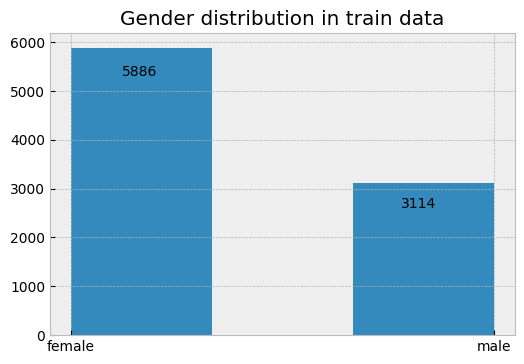

In [10]:
plt.style.use('bmh')

plt.figure(dpi=100)
plt.hist(train['gender'], bins=3)
plt.title('Gender distribution in train data')
plt.text(0.12, 5300, str(train[train.gender == 'female'].shape[0]))
plt.text(0.78, 2600, str(train[train.gender == 'male'].shape[0]))
plt.show()

# Текстовые статистики

In [21]:
from wordcloud import WordCloud

sys.path.insert(0, './asr-shad')
from utils import text_stats

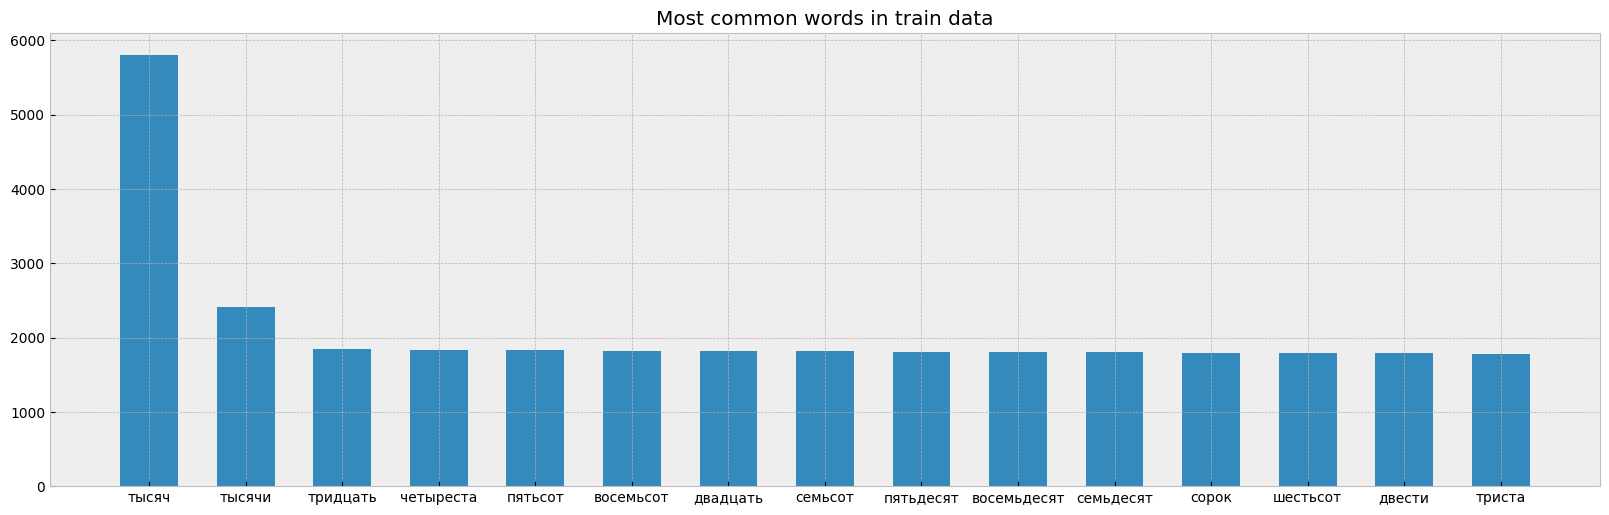

In [22]:
counter_words = text_stats.get_word_counter(train.number)
most_common_words = counter_words.most_common(15)

plt.figure(figsize=(20, 6), dpi=100)
plt.bar([x[0] for x in most_common_words], [x[1] for x in most_common_words], width=0.6)
plt.title('Most common words in train data')
plt.show()

In [23]:
most_common_all_words = counter_words.most_common(len(counter_words))
table_counter_words = pd.DataFrame({'word' : [x[0] for x in most_common_all_words],
                              'occurences' : [x[1] for x in most_common_all_words]    
                            })
# table_counter_words.shape[0]
# 41 different words
table_counter_words.head(10)
# table_counter_words.iloc[20:, :]

,word,occurences
0,тысяч,5806
1,тысячи,2412
2,тридцать,1841
3,четыреста,1837
4,пятьсот,1834
5,восемьсот,1818
6,двадцать,1815
7,семьсот,1812
8,пятьдесят,1807
9,восемьдесят,1807


Total numbers of different words: 41.

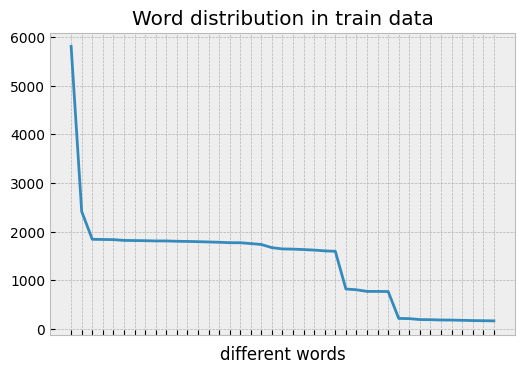

In [24]:
plt.figure(dpi=100)
plt.plot([x[0] for x in most_common_all_words], [x[1] for x in most_common_all_words])
plt.title('Word distribution in train data')
plt.xlabel('different words')
plt.xticks(list(range(table_counter_words.shape[0])), [])
plt.show()

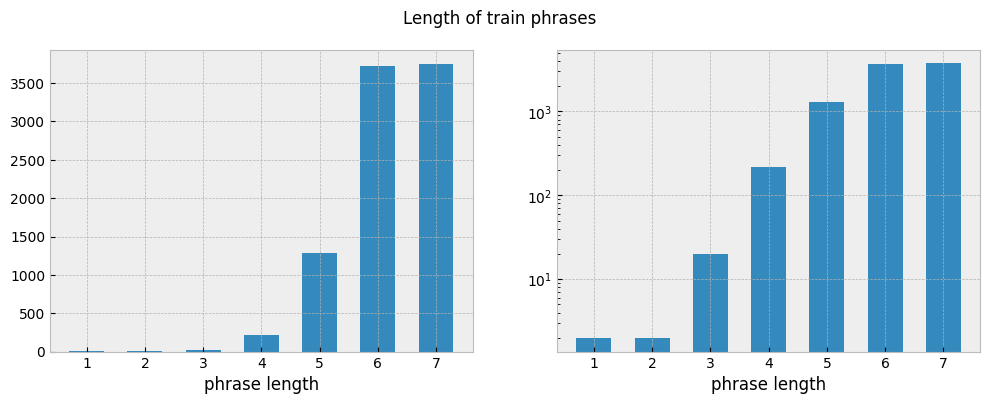

In [25]:
counter_length = text_stats.get_wordcnt_counter(train.number)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=100)
fig.suptitle('Length of train phrases') 

ax1.bar(counter_length.keys(), counter_length.values(), width=0.6)
ax1.set_xlabel('phrase length')
ax2.bar(counter_length.keys(), counter_length.values(), width=0.6, log=True)
ax2.set_xlabel('phrase length')

plt.show()

In [26]:
most_common_length = counter_length.most_common(len(counter_length))
table_counter_length = pd.DataFrame({'phrase length': [x[0] for x in most_common_length],
                              'number of phrases' : [x[1]for x in most_common_length]
                            })
table_counter_length

# check myself
# sum([x[1]for x in most_common_length])

,phrase length,number of phrases
0,7,3750
1,6,3721
2,5,1288
3,4,217
4,3,20
5,2,2
6,1,2


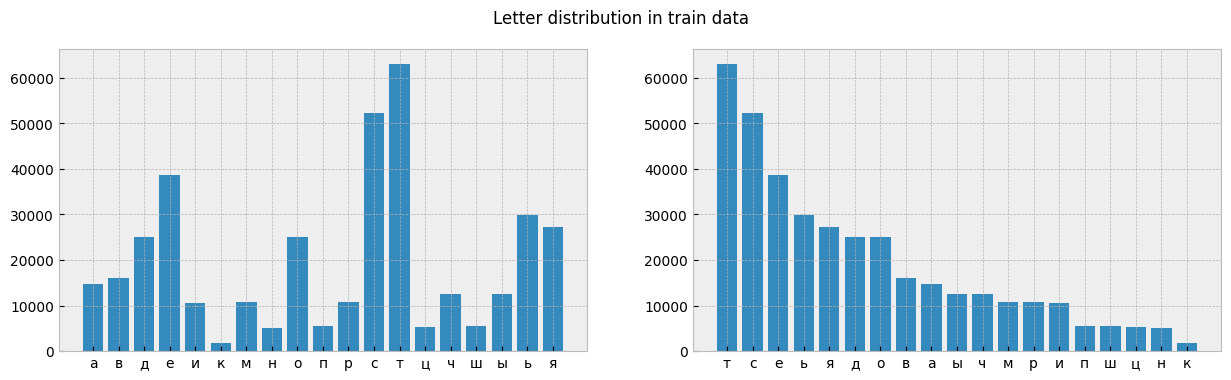

In [27]:
counter_letter = text_stats.get_char_counter(train.number)
letters = list(zip(counter_letter.keys(), counter_letter.values()))
letters.sort()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), dpi=100)
fig.suptitle('Letter distribution in train data') 
 
ax1.bar([x[0] for x in letters], [x[1] for x in letters])

letters.sort(key=lambda x: (x[1], x[0]), reverse=True) 
ax2.bar([x[0] for x in letters], [x[1] for x in letters])
plt.show()

In [28]:
table_letters = pd.DataFrame({'letter' : [x[0] for x in letters],
                              'occurences' : [x[1] for x in letters]
})
# table_letters.shape[0]  
# 19 letters
table_letters.head(10)

,letter,occurences
0,т,63139
1,с,52338
2,е,38776
3,ь,29875
4,я,27165
5,д,25140
6,о,25050
7,в,16116
8,а,14780
9,ы,12612


Total letters: 19.

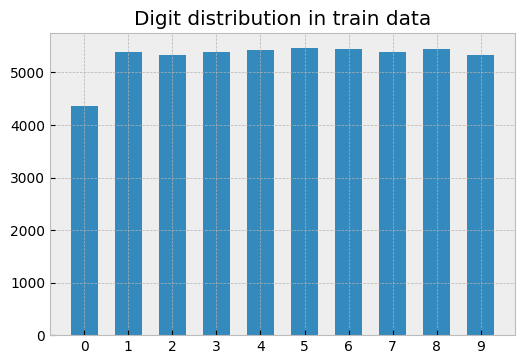

In [29]:
counter_digits = text_stats.get_digit_counter(train.number)
digits = list(zip([x for x in counter_digits.keys()], [x for x in counter_digits.values()]))
digits.sort()

plt.figure(dpi=100)
plt.bar([x[0] for x in digits], [x[1] for x in digits], width=0.6)
plt.title('Digit distribution in train data')
plt.show()

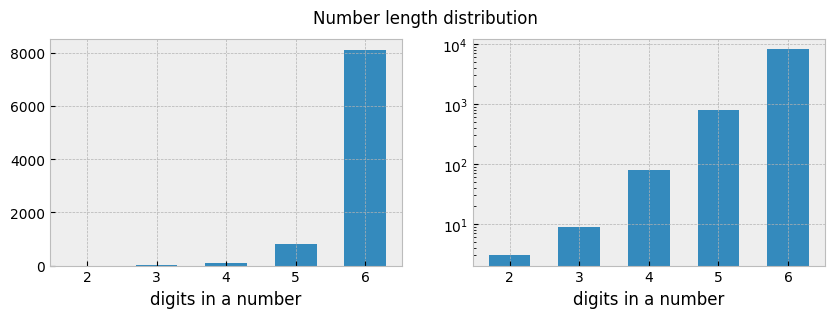

In [31]:
counter_digit_in_num = text_stats.get_digitcnt_counter(train.number)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=100)
fig.suptitle('Number length distribution') 

ax1.bar(counter_digit_in_num.keys(), counter_digit_in_num.values(), width=0.6)
ax1.set_xlabel('digits in a number')
ax2.bar(counter_digit_in_num.keys(), counter_digit_in_num.values(), width=0.6, log=True)
ax2.set_xlabel('digits in a number')

plt.show()

In [32]:
digits_in_num = list(zip(counter_digit_in_num.keys(), counter_digit_in_num.values()))
digits_in_num.sort()
table_digit_in_num = pd.DataFrame({'digits' : [x[0] for x in digits_in_num],
                                   'number of phrases' : [x[1] for x in digits_in_num]
                                 })
table_digit_in_num

,digits,number of phrases
0,2,3
1,3,9
2,4,79
3,5,803
4,6,8106


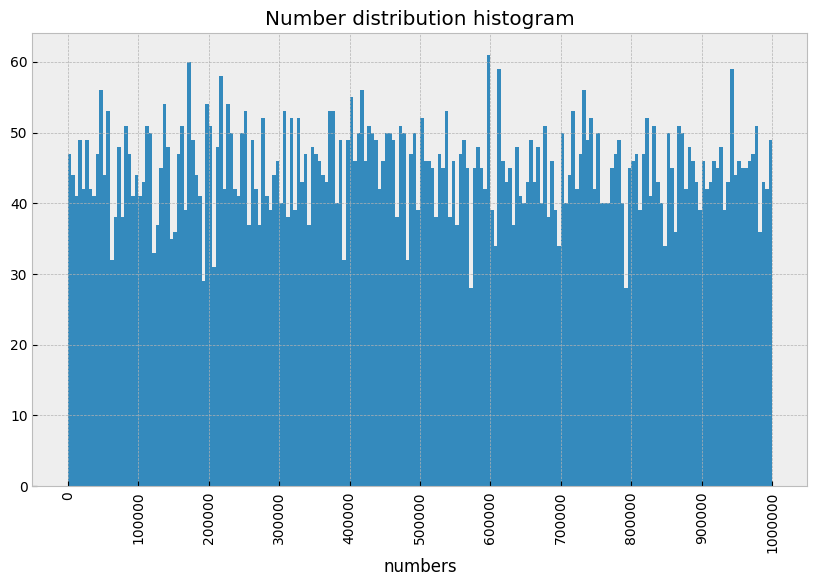

In [33]:
train_numbers = list(train.number)
# min(train_numbers), max(train_numbers)
# 14 and 999888
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(sorted(train_numbers), bins=200)  # one bin for every 5000 elements 
plt.title('Number distribution histogram')
plt.xlabel('numbers')
plt.xticks(ticks=list(range(0, 1100000, 100000)), labels=list(map(str, range(0, 1100000, 100000))), rotation=90)
plt.show()

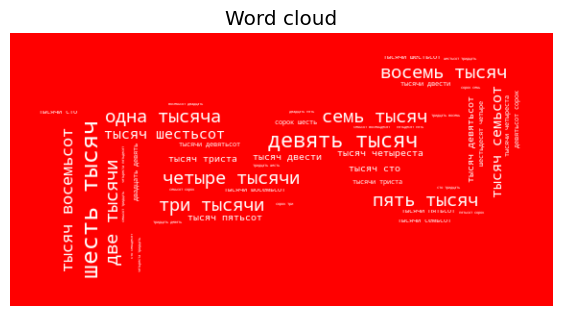

In [34]:
from PIL import Image
import random

from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(text_stats.get_word_pool(train.number))
mask = np.array(Image.open('/content/drive/My Drive/Colab Notebooks/ржд.jpg'))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % 1000
#image_colors = ImageColorGenerator(mask)

wc = WordCloud(background_color='red', color_func=grey_color_func, max_words=1000, mask=mask, margin=10,
               random_state=18).generate(text)

plt.figure(figsize=(7, 4), dpi=100)
plt.title("Word cloud")
plt.imshow(wc, interpolation="bilinear")

plt.axis("off")
plt.show()

# Статистики аудио

In [7]:
train_stats = pd.read_csv(INPUT_DIR + '/train_audio_stats.csv')

In [10]:
train_stats.head(10)
# train.shape  # (9000, 7)

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,c9f135a051.wav,1,62074,24000,124192,2.586417,16
1,ba12ffc49a.wav,1,70800,24000,141644,2.950000,16
2,163b0615c2.wav,1,70955,24000,141954,2.956458,16
3,e501388a6c.wav,1,72367,24000,144778,3.015292,16
4,813db80f67.wav,1,74902,24000,149848,3.120917,16
5,60357f0884.wav,1,78707,24000,157458,3.279458,16
6,a4324f5482.wav,1,45116,24000,90276,1.879833,16
7,657d98b848.wav,1,74730,24000,149504,3.113750,16
8,1039d79a59.wav,1,61146,24000,122336,2.547750,16
9,a956a07793.wav,1,76453,24000,152950,3.185542,16


In [11]:
train_stats.describe()

,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
count,9000.0,9000.000000,9000.0,9000.000000,9000.000000,9000.0
mean,1.0,70670.257222,24000.0,141384.514444,2.944594,16.0
std,0.0,8559.040935,0.0,17118.081869,0.356627,0.0
min,1.0,25689.000000,24000.0,51422.000000,1.070375,16.0
25%,1.0,65448.750000,24000.0,130941.500000,2.727031,16.0
50%,1.0,71517.000000,24000.0,143078.000000,2.979875,16.0
75%,1.0,76847.750000,24000.0,153739.500000,3.201990,16.0
max,1.0,91956.000000,24000.0,183956.000000,3.831500,16.0


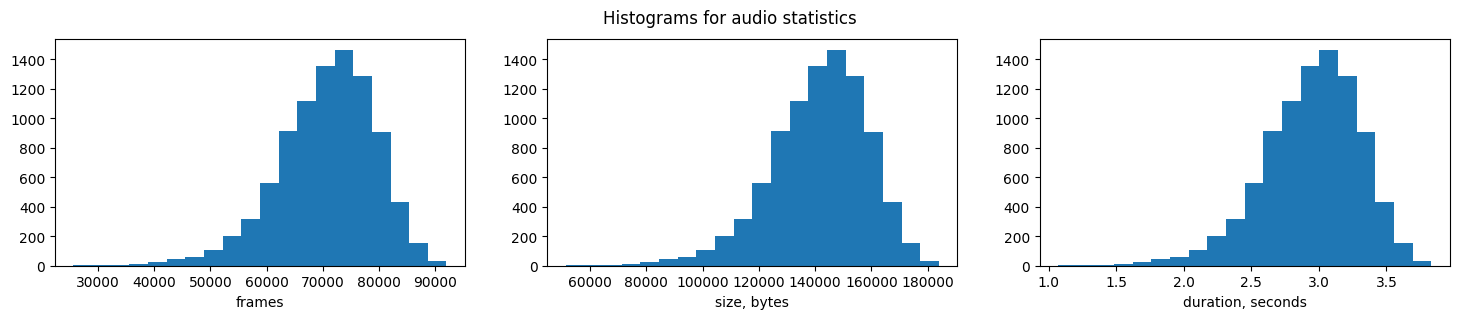

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 3), dpi=100)
fig.suptitle('Histograms for audio statistics') 

ax1.hist(train_stats.frames, bins=20)
ax1.set_xlabel('frames')
ax2.hist(train_stats.size_bytes, bins=20)
ax2.set_xlabel('size, bytes')
ax3.hist(train_stats.duration_s, bins=20)
ax3.set_xlabel('duration, seconds')
plt.show()

Комментарий: количество фреймов, размер и длительность хорошо скоррелированы между собой (что выглядит логично), поэтому в качестве фичи можно выбрать что-то одно.

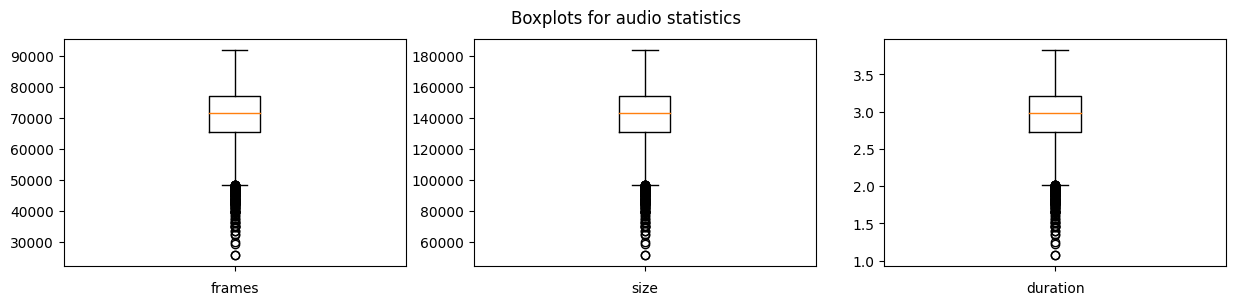

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 3), dpi=100)
fig.suptitle('Boxplots for audio statistics') 

ax1.boxplot(train_stats.frames)
ax1.set_xticklabels([])
ax1.set_xlabel('frames')
ax2.boxplot(train_stats.size_bytes)
ax2.set_xticklabels([])
ax2.set_xlabel('size')
ax3.boxplot(train_stats.duration_s)
ax3.set_xticklabels([])
ax3.set_xlabel('duration')
plt.show()

# **Мой вклад**

# Функции для построения графиков на основе torchaudio

Waveform - тензор, который (наряду с битрейтом) возвращает функция `load` при загрузке аудиофайла. Размер тензора $C \times L$ или $L\times C$, где $L$ - количество фреймов, $C$ - количество каналов.

Документация: https://pytorch.org/audio/#torchaudio.load

Спектрограмма - изображение, показывающее зависимость спектральной плотности мощности (то есть мощности в единицу частоты) сигнала от времени. Функция `torchaudio.transforms.Spectrogram()` принимает `waveform` типа `torch.Tensor`, возвращает `torch.Tensor`.

MelSpectrogram - композиция MelScale и Spectrogram. MelScale преобразует оконное преобразование Фурье для обычной частоты звука в преобразование Фурье для частоты в мелах.

MFCC возвращает Mel-frequency cepstrum coefficients в виде тензора, где кепстр - функция обратного преобразования Фурье от логарифма спектра мощности сигнала.

Документация: https://pytorch.org/audio/transforms.html

In [437]:
sys.path.insert(0, "./asr-shad/utils")
from torchaudio_methods import draw_waveform, draw_spectrogram

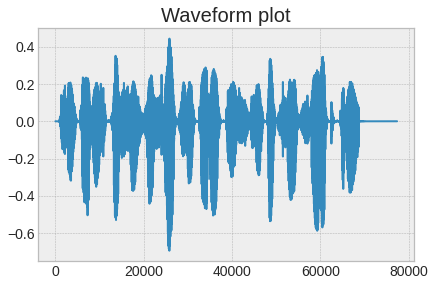

In [439]:
filename = INPUT_DIR + '/numbers/train/0a0e03cd54.wav'
waveform, sample_rate = torchaudio.load(filename)

plt.title('Waveform plot')
draw_waveform(waveform, 'waveform')

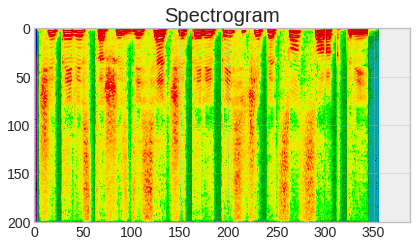

In [440]:
plt.title('Spectrogram')
draw_spectrogram(waveform, kind='spec', output_file='spectrogram')

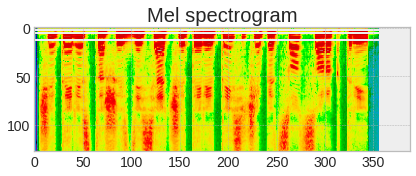

In [441]:
plt.title('Mel spectrogram')
draw_spectrogram(waveform, kind='melspec', output_file='melspectrogram')

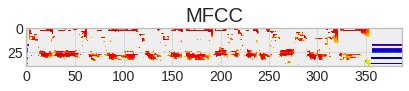

In [442]:
plt.title('MFCC')
draw_spectrogram(waveform, kind='mfcc', output_file='mfcc')

# Функция для вычисления целевой метрики WER

Фунция написана, покрыта тестами.


# **Краткое описание моей модели ASR для поставленной задачи**

# Попробовать простую модель для задачи регрессии

Сделать прикидку с другой метрикой, например, MSE для численных ответов, сравнить с WER.

Признаки: бинаризовать gender, выбрать что-то одно из трех скоррелированных, добавить спектральные признаки (центроид, спад, ширина), сгенерировать признаки из спектрограмм (усреднения, брать точки с некоторым шагом, etc.) и обучить линейный регрессор и случайный лес.

# Сложная модель

Quarz Net (рекомендована),  Deep Speech 2 (по наличию обзоров выглядит дружелюбно)

Можно не спускаться до уровня фонем, а пытаться построить классификацию на словах, посмотреть seq2seq, 